In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dft=pd.read_csv('/content/drive/My Drive/IBM_sentiment_analysis/data/cleaned_vader_labelled_5days_partition/mar_26-31.csv')
dft.head()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-03-26,1242965375509127168,God bless our Troops 🇺🇸 https://t.co/aXGO5az0QR,[],325.0,"{'country_code': 'in', 'state': 'Bihar', 'cou...",god bless troops,1
1,2020-03-26,1242968404719325184,"Lets boycott china,#shamechina #coronavirus #2...","['shamechina', 'coronavirus', '21daylockdown',...",8.0,{'country_code': 'in'},lets boycott china shamechina coronavirus dayl...,-1
2,2020-03-26,1242969387763548160,Will Work With India To Combat COVID-19 Outbre...,[],1.0,{'country_code': 'in'},work india combat covid outbreak says top us d...,-1
3,2020-03-26,1242971553983123457,"Madam @DeShobhaa, #CoronaVirus is not yet a ci...","['CoronaVirus', 'ChineseVirus', 'Cibil']",0.0,{'country_code': 'in'},madam coronavirus yet citizen india chinesevir...,1
4,2020-03-26,1242989565536698368,Harshest punishment for racism... https://t.co...,[],0.0,"{'country_code': 'in', 'state': 'Delhi', 'cit...",harshest punishment racism,-1


In [ ]:
df=dft
print(df.shape)
df.isnull().sum()
df.head()

(568223, 8)


,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
0,2020-03-26,1242965375509127168,God bless our Troops 🇺🇸 https://t.co/aXGO5az0QR,[],325.0,"{'country_code': 'in', 'state': 'Bihar', 'cou...",god bless troops,1
1,2020-03-26,1242968404719325184,"Lets boycott china,#shamechina #coronavirus #2...","['shamechina', 'coronavirus', '21daylockdown',...",8.0,{'country_code': 'in'},lets boycott china shamechina coronavirus dayl...,-1
2,2020-03-26,1242969387763548160,Will Work With India To Combat COVID-19 Outbre...,[],1.0,{'country_code': 'in'},work india combat covid outbreak says top us d...,-1
3,2020-03-26,1242971553983123457,"Madam @DeShobhaa, #CoronaVirus is not yet a ci...","['CoronaVirus', 'ChineseVirus', 'Cibil']",0.0,{'country_code': 'in'},madam coronavirus yet citizen india chinesevir...,1
4,2020-03-26,1242989565536698368,Harshest punishment for racism... https://t.co...,[],0.0,"{'country_code': 'in', 'state': 'Delhi', 'cit...",harshest punishment racism,-1


In [ ]:
df.tail()

,date,id,text,hashtags,retweet_count,location,cleaned,sentiment
568218,2020-03-31,1245038388786290688,Fuck China. https://t.co/ada53qsS3l,[],0.0,{'country_code': 'in'},fuck china,-1
568219,2020-03-31,1244875857690128386,A must read thread over incompetence of govt.\...,['Nizamuddin'],5.0,{'country_code': 'in'},must read thread incompetence govt congregatio...,-1
568220,2020-03-31,1245014680717815809,Stay strong people of France. We will winner o...,[],0.0,{'country_code': 'in'},stay strong people france winner one day,1
568221,2020-03-31,1245061451351351298,"ALL KINDS OF LEADERSHIP BE IT POLITICAL, RELI...",[],1.0,"{'country_code': 'in', 'state': 'West Bengal'...",kinds leadership political religious kind must...,1
568222,2020-03-31,1244842424528142339,‘Not my area of expertise’: Joe Root on player...,[],0.0,"{'country_code': 'in', 'state': 'Delhi'}",area expertise joe root players alleged pay cu...,-1


In [ ]:
print(df.shape)
df.isnull().sum()

(568223, 8)


date             0
id               0
text             0
hashtags         8
retweet_count    8
location         8
cleaned          0
sentiment        0
dtype: int64

In [ ]:
!pip install -U pywsd

     |████████████████████████████████| 26.8MB 166kB/s 
     |████████████████████████████████| 31.6MB 146kB/s 
  Created wheel for pywsd: filename=pywsd-1.2.4-cp36-none-any.whl size=26940453 sha256=309db1da9569d4176311329436a56b8d1d01a179b8f1966bddb1752dbf8bb801
  Stored in directory: /root/.cache/pip/wheels/71/4d/d2/405b948047f7f3851f16ab9d893ce7c1a3010182900884536b
  Created wheel for wn: filename=wn-0.0.23-cp36-none-any.whl size=31792943 sha256=fc07158f60eb4cecbaf727b3654f66ff462f2acf12b2887d53c302e19c5ed892
  Stored in directory: /root/.cache/pip/wheels/56/e3/c4/886021dbf4d758dc3cb9ddaa47d7d6fc895240d83f010e6305
Successfully built pywsd wn


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
text_clean=df['cleaned']

In [ ]:
text_clean=text_clean.str.replace('?','')
text_clean=text_clean.str.replace('!','')

In [ ]:
text_clean[:5]

0                                     god bless troops
1    lets boycott china shamechina coronavirus dayl...
2    work india combat covid outbreak says top us d...
3    madam coronavirus yet citizen india chinesevir...
4                           harshest punishment racism
Name: cleaned, dtype: object

In [ ]:
print(len(text_clean))
text_clean[0]

568223


'god bless troops'

In [ ]:
from pywsd.utils import lemmatize_sentence
t_clean=[lemmatize_sentence(s) for s in text_clean]

In [ ]:
t_clean[0]

['god', 'bless', 'troop']

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
from itertools import chain
words=list(chain.from_iterable(t_clean))


In [ ]:
print(words[0])

god


In [ ]:
string=' '.join(words)

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10,stopwords=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel']).generate(string)

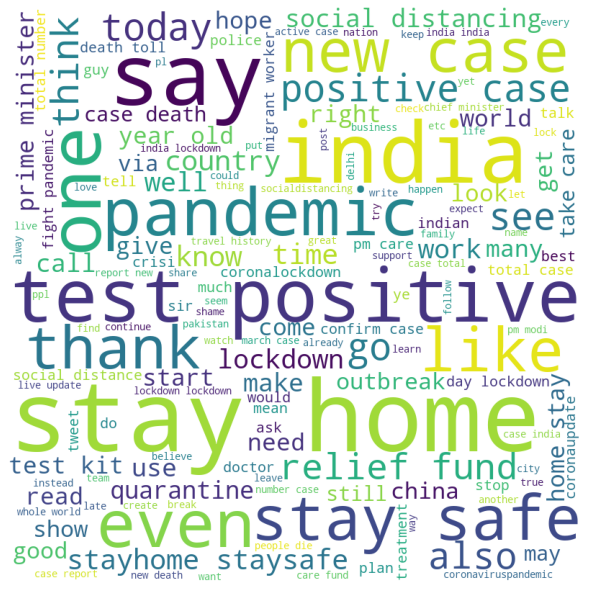

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
f_clean=[]
for l in t_clean:
  s=' '.join(l)
  f_clean.append(s)

In [ ]:
f_clean[:5]

['god bless troop',
 'let boycott china shamechina coronavirus daylockdown chinacoronavirus chinesevirus',
 'work india combat covid outbreak say top u diplomat',
 'madam coronavirus yet citizen india chinesevirus cibil score null equal respect indian zero',
 'harsh punishment racism']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, ngram_range=(2,3),stop_words=['corona','coronavirus','virus','coronavirusoutbreak','covid','viru','coronaviru','novel'])
tf = tf_vectorizer.fit_transform(f_clean)
tf_feature_names = tf_vectorizer.get_feature_names()

In [ ]:
tf_feature_names

['across country',
 'across globe',
 'across india',
 'across state',
 'across world',
 'action take',
 'active case',
 'active case total',
 'akshay kumar',
 'also take',
 'amid crisis',
 'amid lockdown',
 'amid outbreak',
 'amid pandemic',
 'amidst lockdown',
 'anand vihar',
 'anand vihar bus',
 'andhra pradesh',
 'announce lockdown',
 'ap cm',
 'april fool',
 'around world',
 'arvind kejriwal',
 'asharamji bapu',
 'ask people',
 'attend religious',
 'back home',
 'bbc news',
 'become first',
 'behind bar',
 'benefit satsang',
 'best way',
 'boris johnson',
 'boris johnson test',
 'break chain',
 'break news',
 'bring back',
 'bring total',
 'bus terminal',
 'call chinese',
 'call chinesevirus',
 'care fund',
 'care fund fight',
 'care worker',
 'case case',
 'case china',
 'case confirm',
 'case country',
 'case cross',
 'case day',
 'case death',
 'case death recover',
 'case delhi',
 'case detect',
 'case increase',
 'case india',
 'case kashmir',
 'case last',
 'case last hour',


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [ ]:
def display_topics(model, feature_names, no_top_words):
  s=''
  for topic_idx, topic in enumerate(model.components_):
    s=s+("Topic %d:" % (topic_idx))
    s=s+(",".join([feature_names[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]))
    s=s+'\n'
  return s

no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

'Topic 0:stay home,test kit,pm modi,india india,namo app,via namo,via namo app,save life,india lockdown,india fight\nTopic 1:new case,total case,case death,new death,th march,report new,case total,new york,active case,india news\nTopic 2:test positive,positive case,year old,total number,case india,number case,travel history,due lockdown,case report,social medium\nTopic 3:pm care,pm care fund,fight pandemic,people die,whole world,march case,amid lockdown,donate rs,case march,case march case\nTopic 4:stayhome staysafe,live update,confirm case,please take,community transmission,staysafe stayhome,wear mask,india indiafightscorona,help people,jammu kashmir\nTopic 5:stay safe,stay home,social distancing,home stay,stay home stay,migrant worker,home stay safe,social distance,tablighi jamaat,work home\nTopic 6:coronarisk releaseasarambapuji,sant shri,asharamji bapu,take action,shri asharamji bapu,shri asharamji,sant shri asharamji,delhi govt,small contribution,sir please\nTopic 7:care fund,take

In [ ]:
lda.perplexity(tf)

566.0449101174503

In [ ]:
f=open('lda_mar_26-31.pk','wb')
import pickle
pickle.dump(lda, f)
f.close()

In [ ]:
f = open("topics_mar_26-31.txt", "w")
f.write(display_topics(lda, tf_feature_names, no_top_words))
f.close()

In [ ]:
import shutil
shutil.move('lda_mar_26-31.pk','/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/saved_models/lda_mar_26-31.pk')
shutil.move("topics_mar_26-31.txt",'/content/drive/My Drive/IBM_sentiment_analysis/topic_modelling/topics_text_files/topics_mar_26-31.txt')